In [20]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
num_datasets 11 8


In [21]:
# run comparison aggregations
!python3 "../02_aggregate_comparisons.py"

	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/sonar/train-test
../02_aggregate_comparisons.py:52: UserWarning: bad complexity range
  warnings.warn(f'bad complexity range')
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/heart/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/breast-cancer/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/haberman/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/ionosphere/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/diabetes/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/german-credit/train-test
	processing path /accounts/projects/vision/chandan/rules-experiments/results/reg_data/juvenile/train-test
	processing path /accounts/projects/

# classification

/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


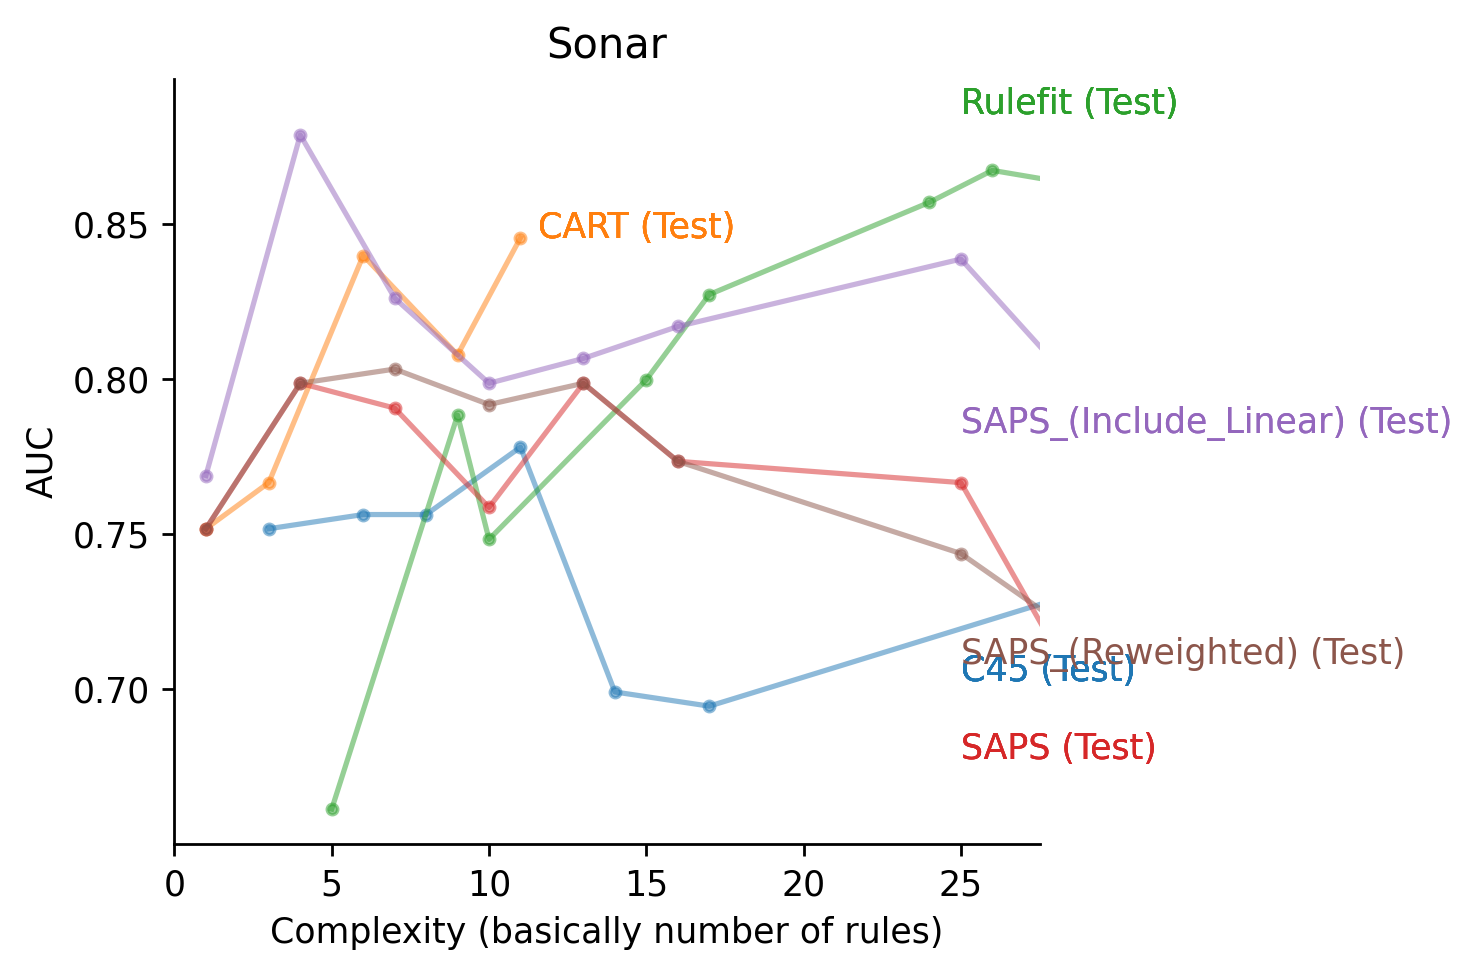

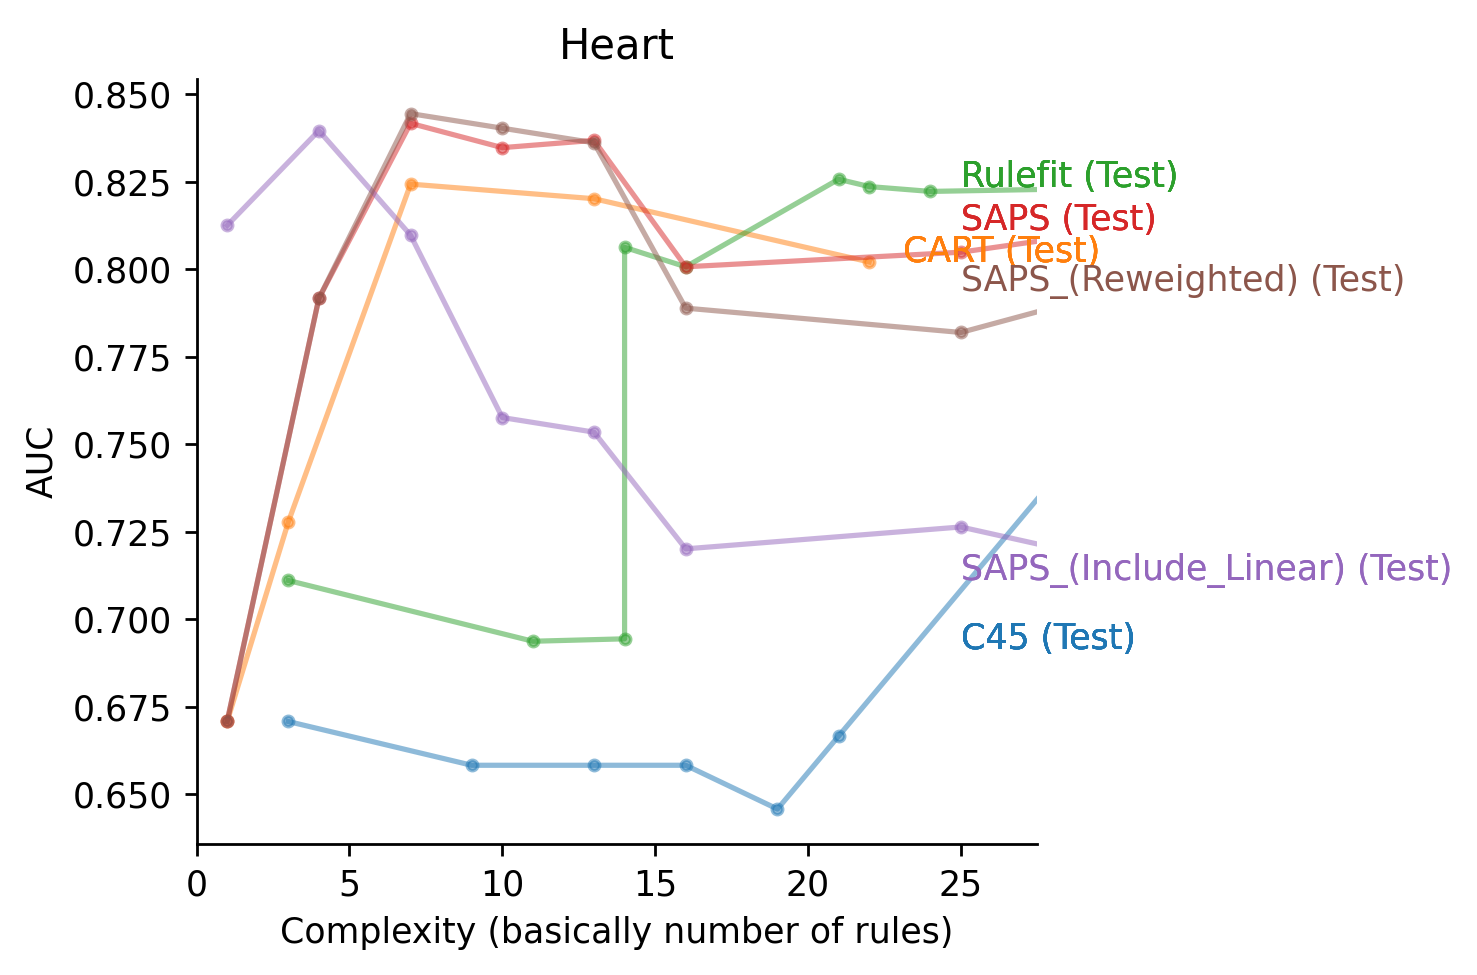

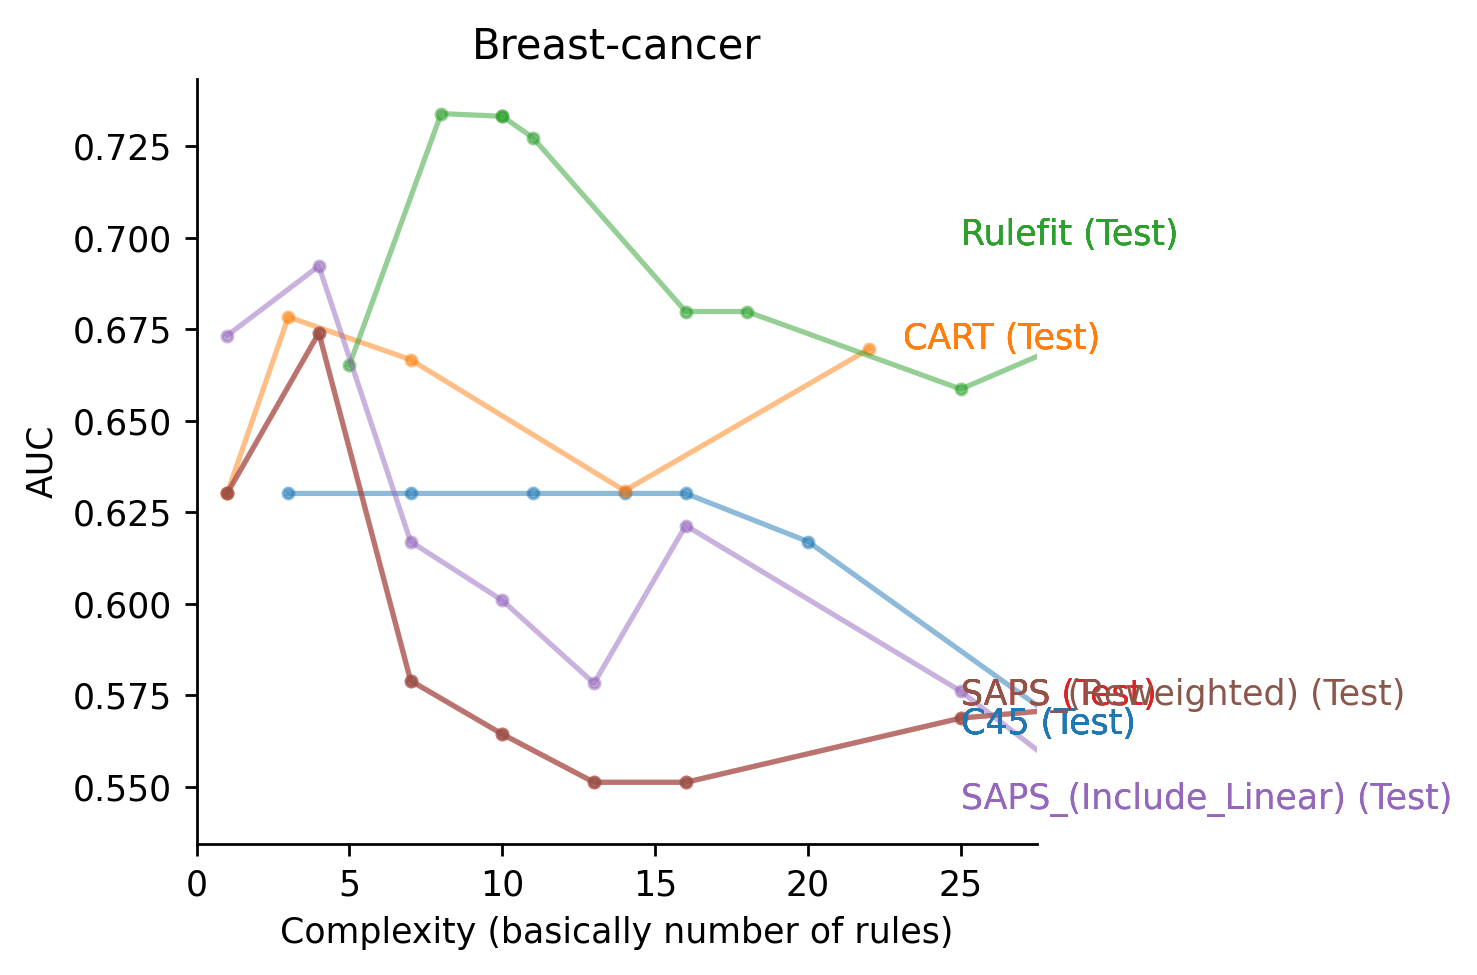

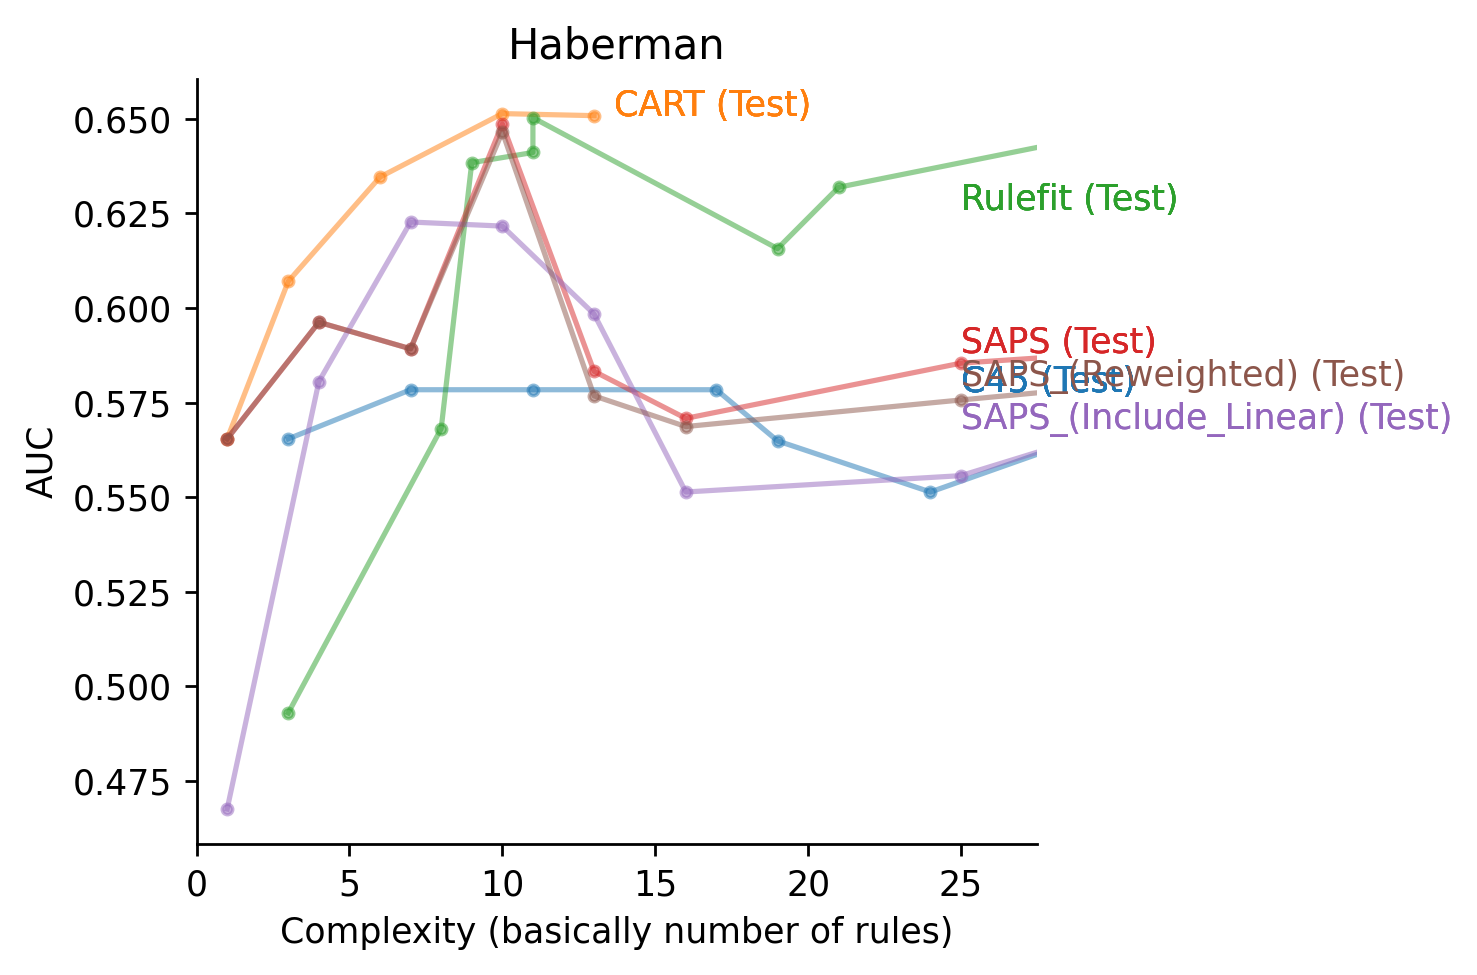

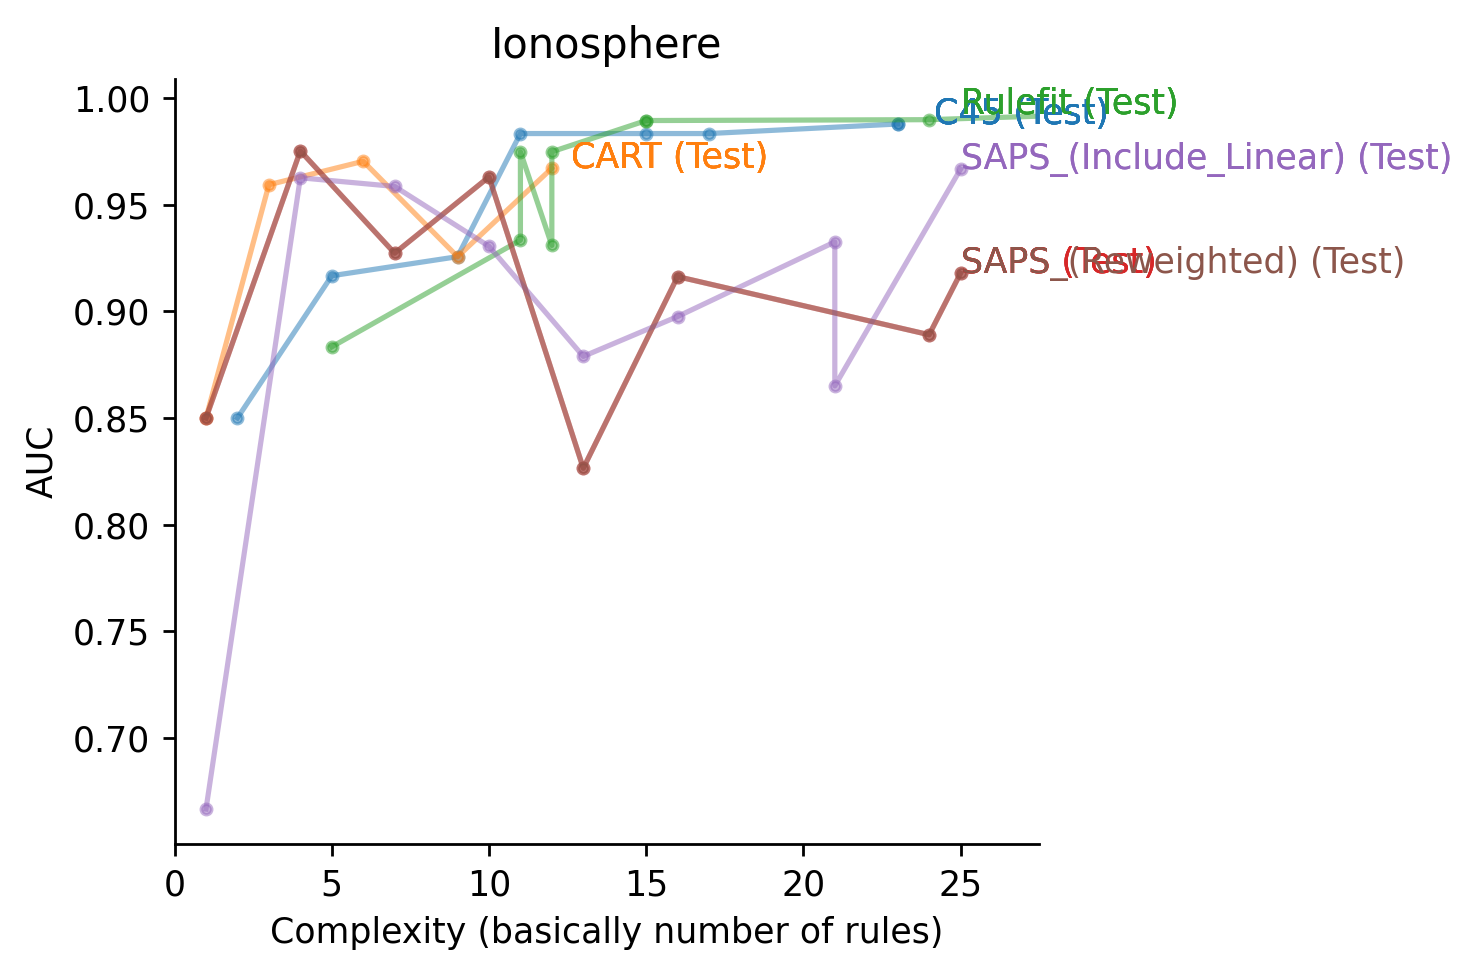

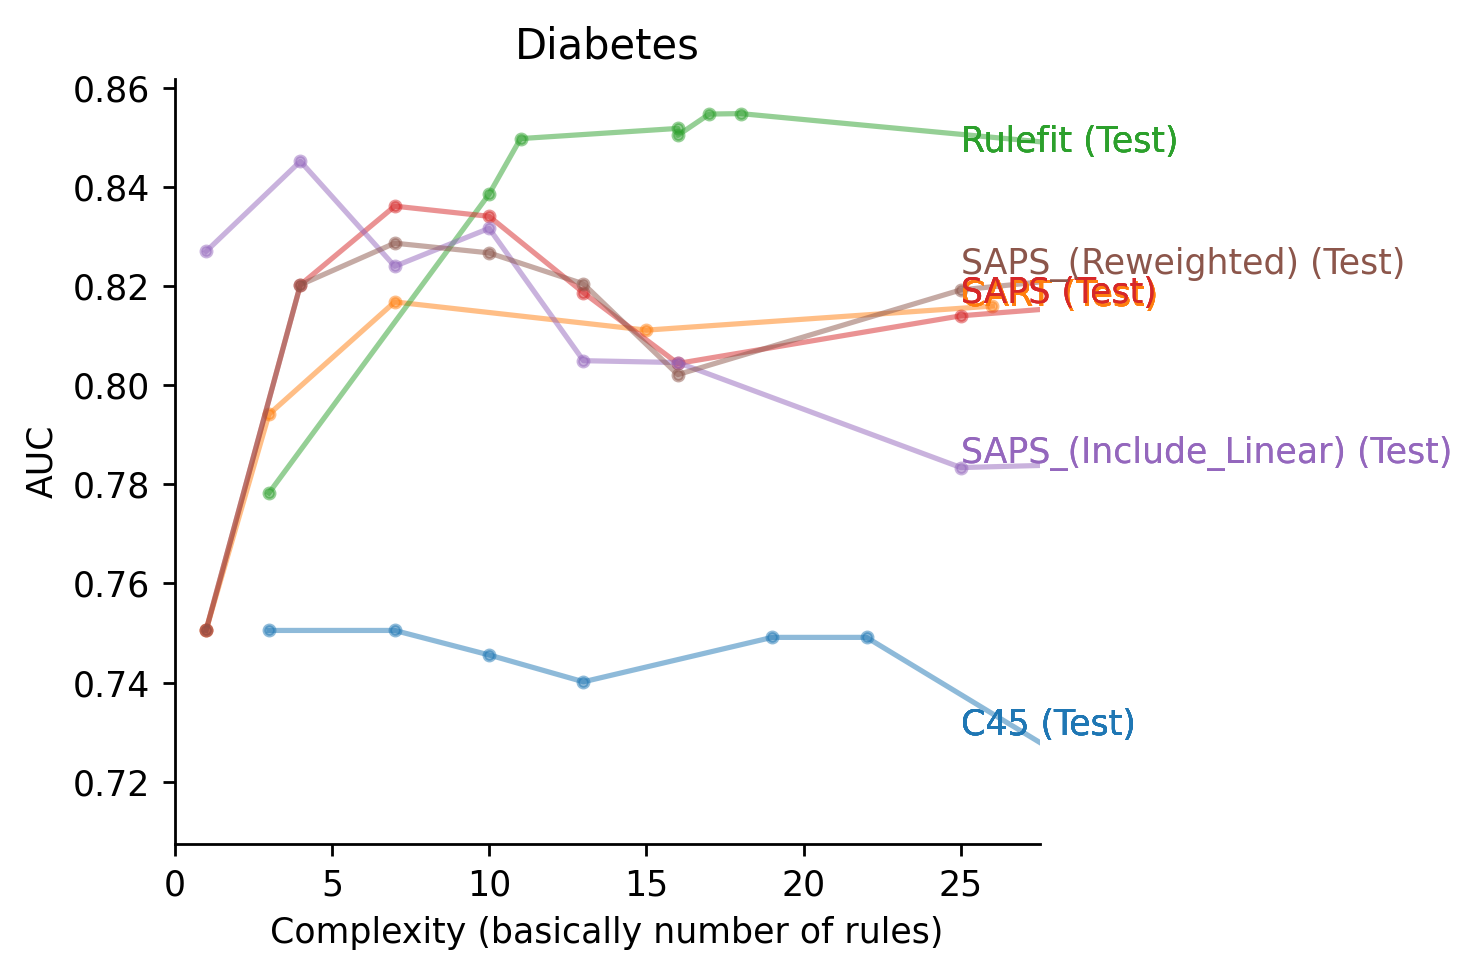

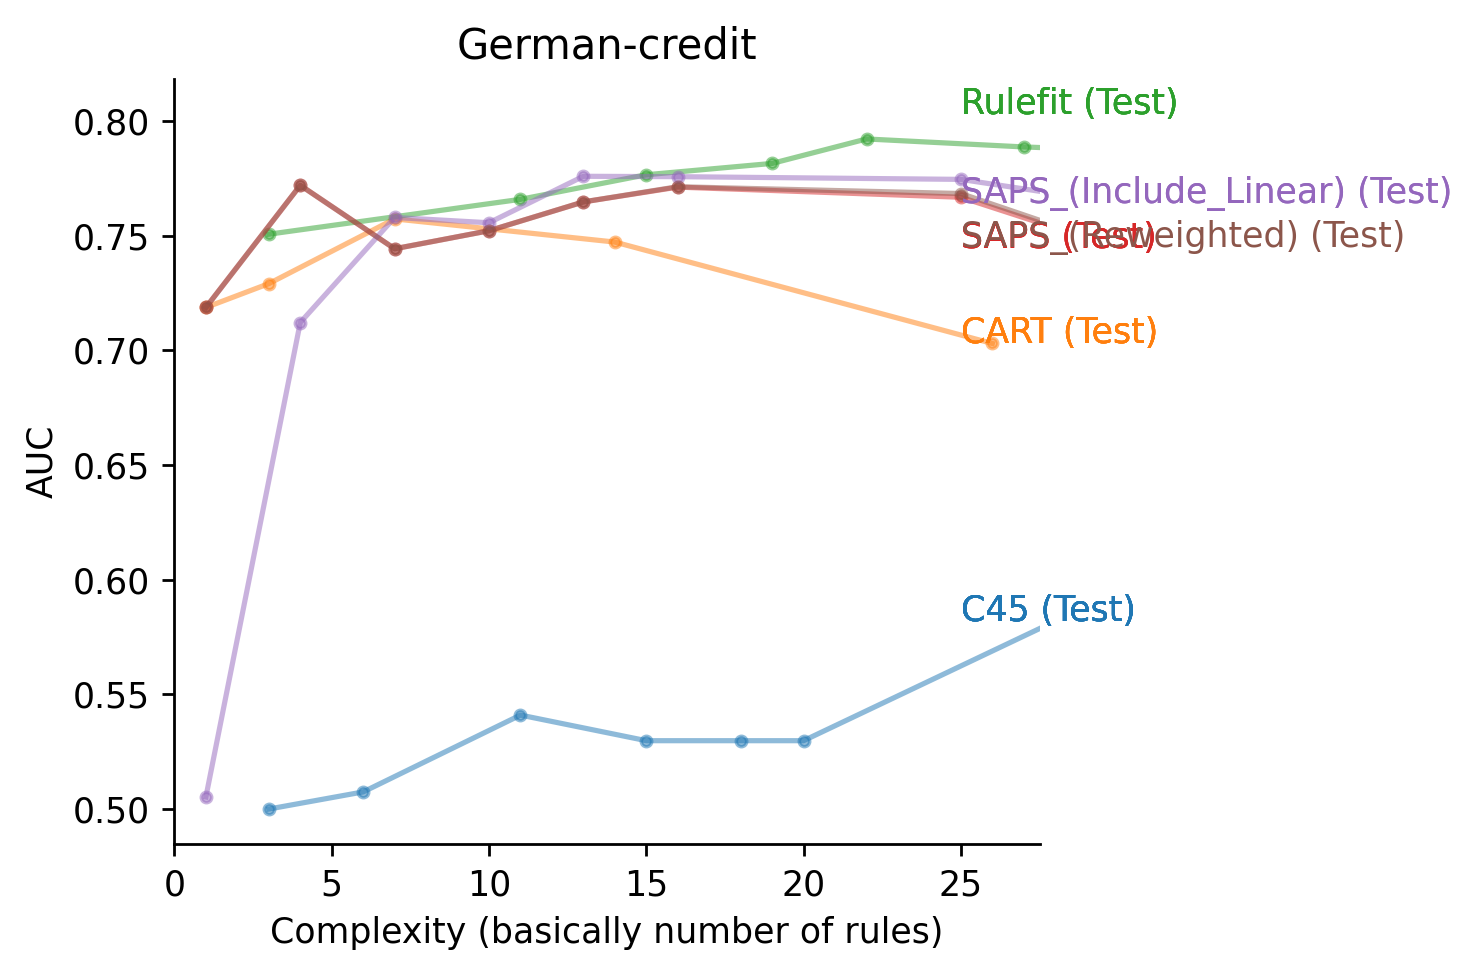

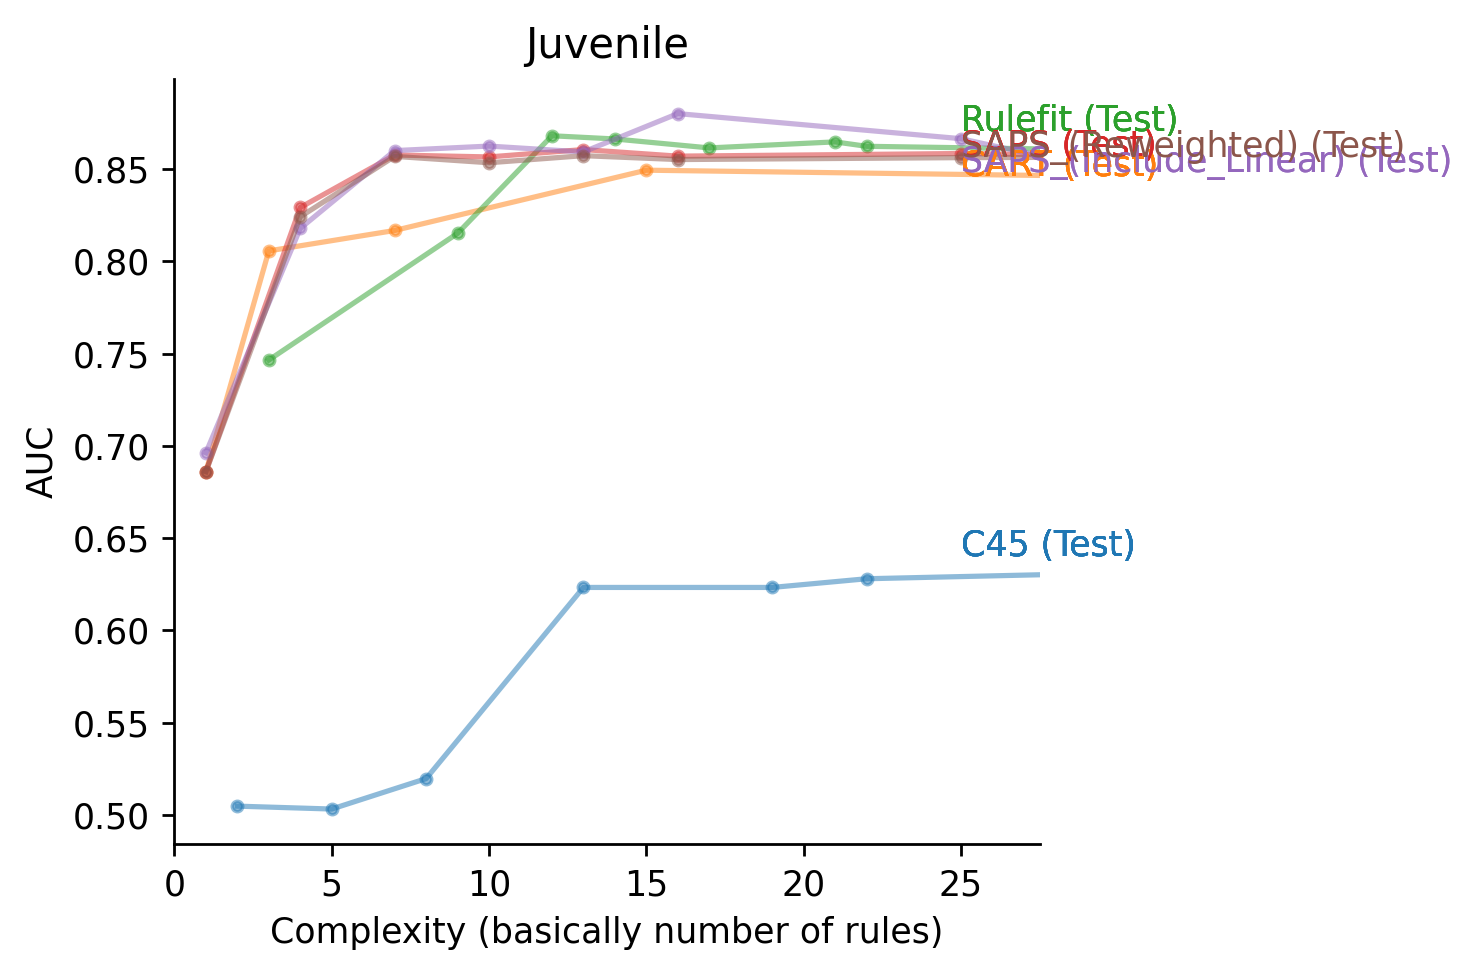

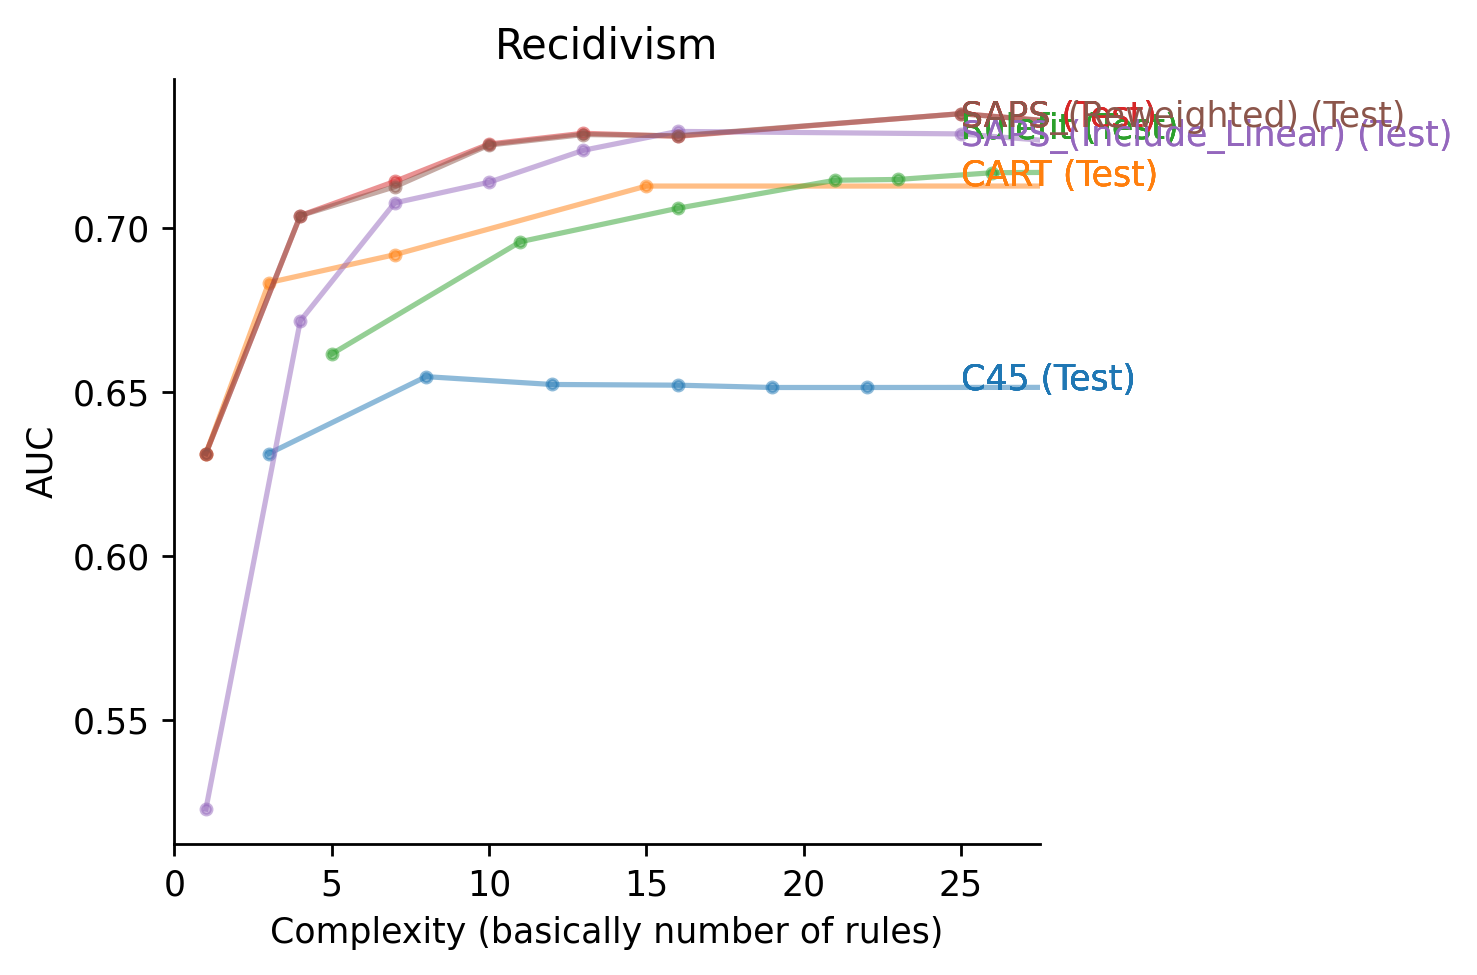

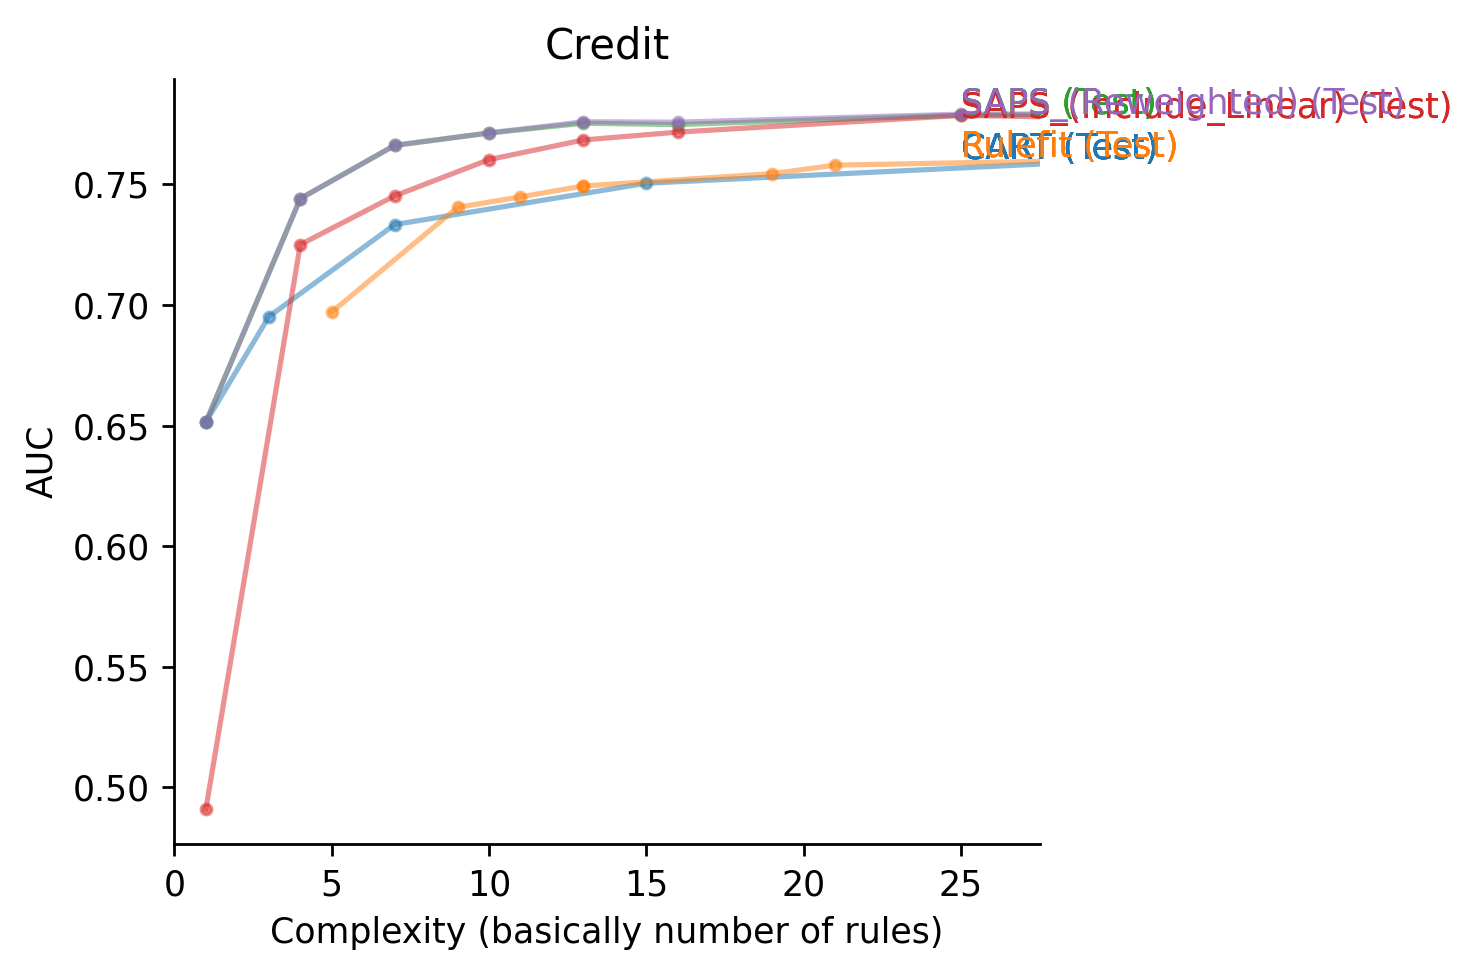

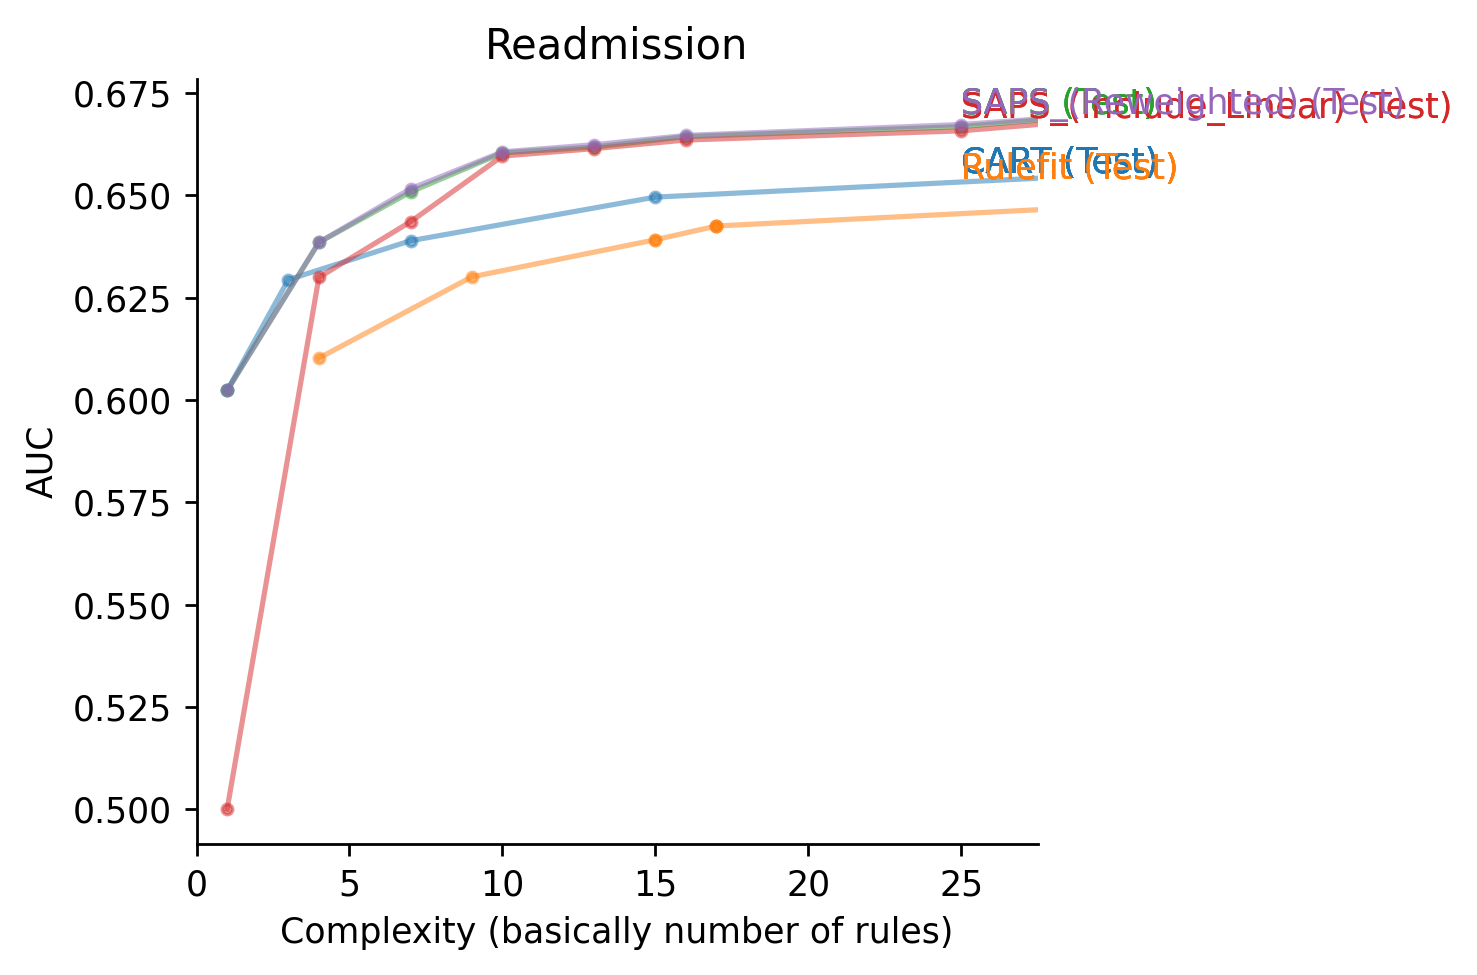

In [22]:
metric = 'rocauc'
for dset in DATASETS_CLASSIFICATION:
    dset_name = dset[0]
    try:
        pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index

        #     print(list(df.keys()))
        plt.figure(figsize=(6, 4))
        #     R, C = 1, 2
        for i, (name, g) in enumerate(df.groupby('model')):
            args = np.argsort(g[f'{dset_name}_complexity'])
            plt.title(dset_name.capitalize())
            alpha = 1.0 if 'saps' in dset_name else 0.5            
            kwargs = dict(color=colors[i], alpha=alpha)            

            plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                     label=name + ' (Test)')
#             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                      label=name + ' (Train)')
            plt.xlabel('Complexity (basically number of rules)')
            plt.xlim((0, 25))
            plt.ylabel('AUC')
            dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)
        plt.show()
    except:
        print('skipping', dset_name)

# regression

/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()
/accounts/projects/vision/.local/lib/python3.7/site-packages/dvu/dvu.py:81: UserWarn

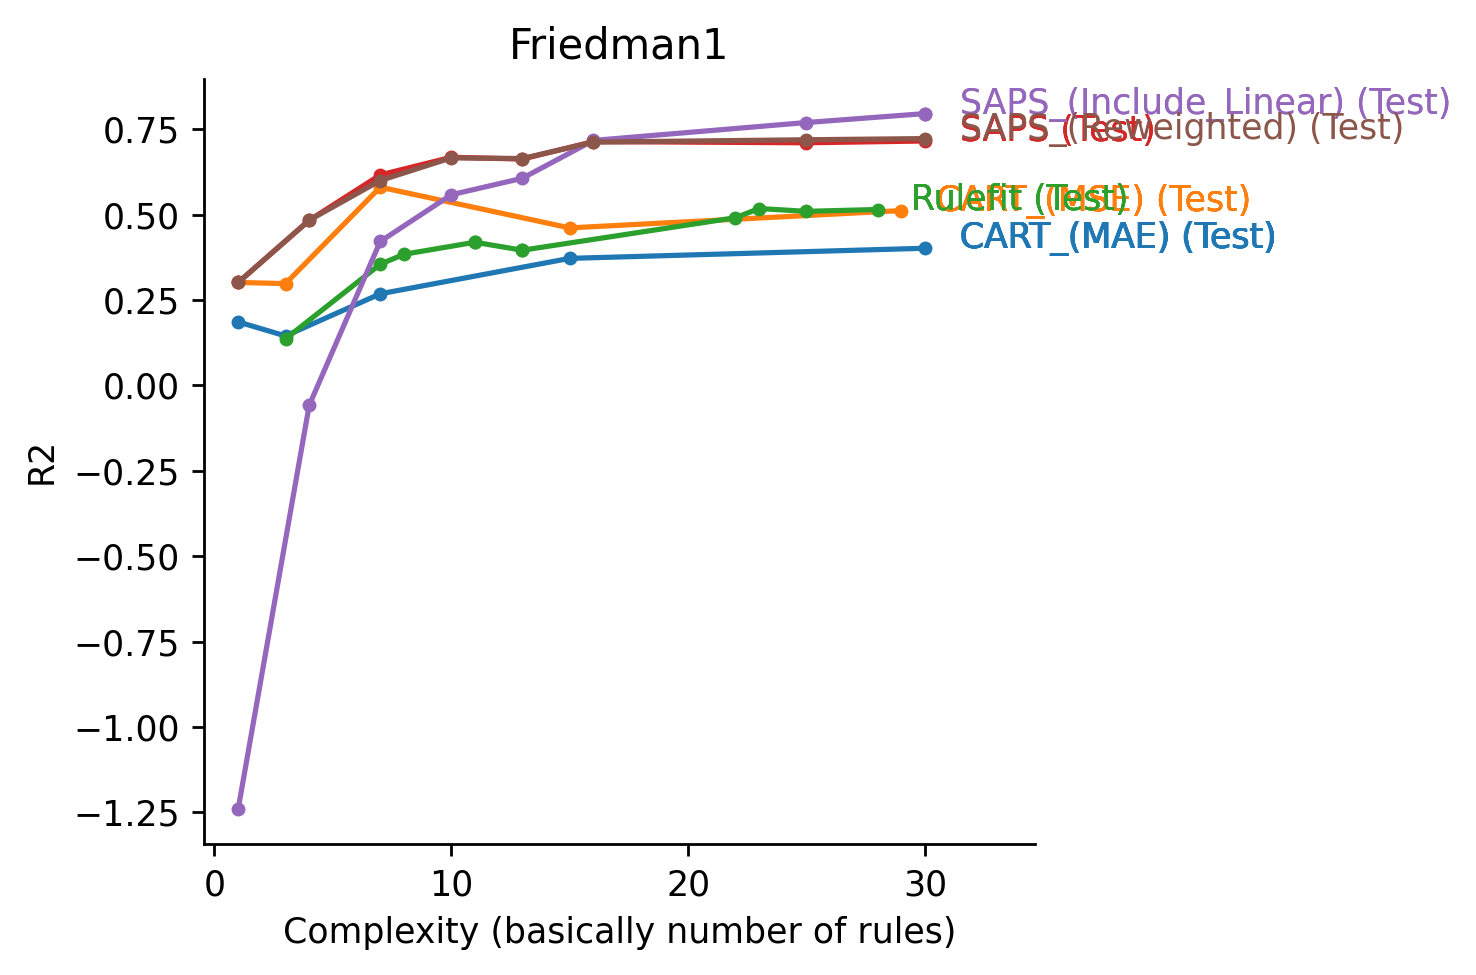

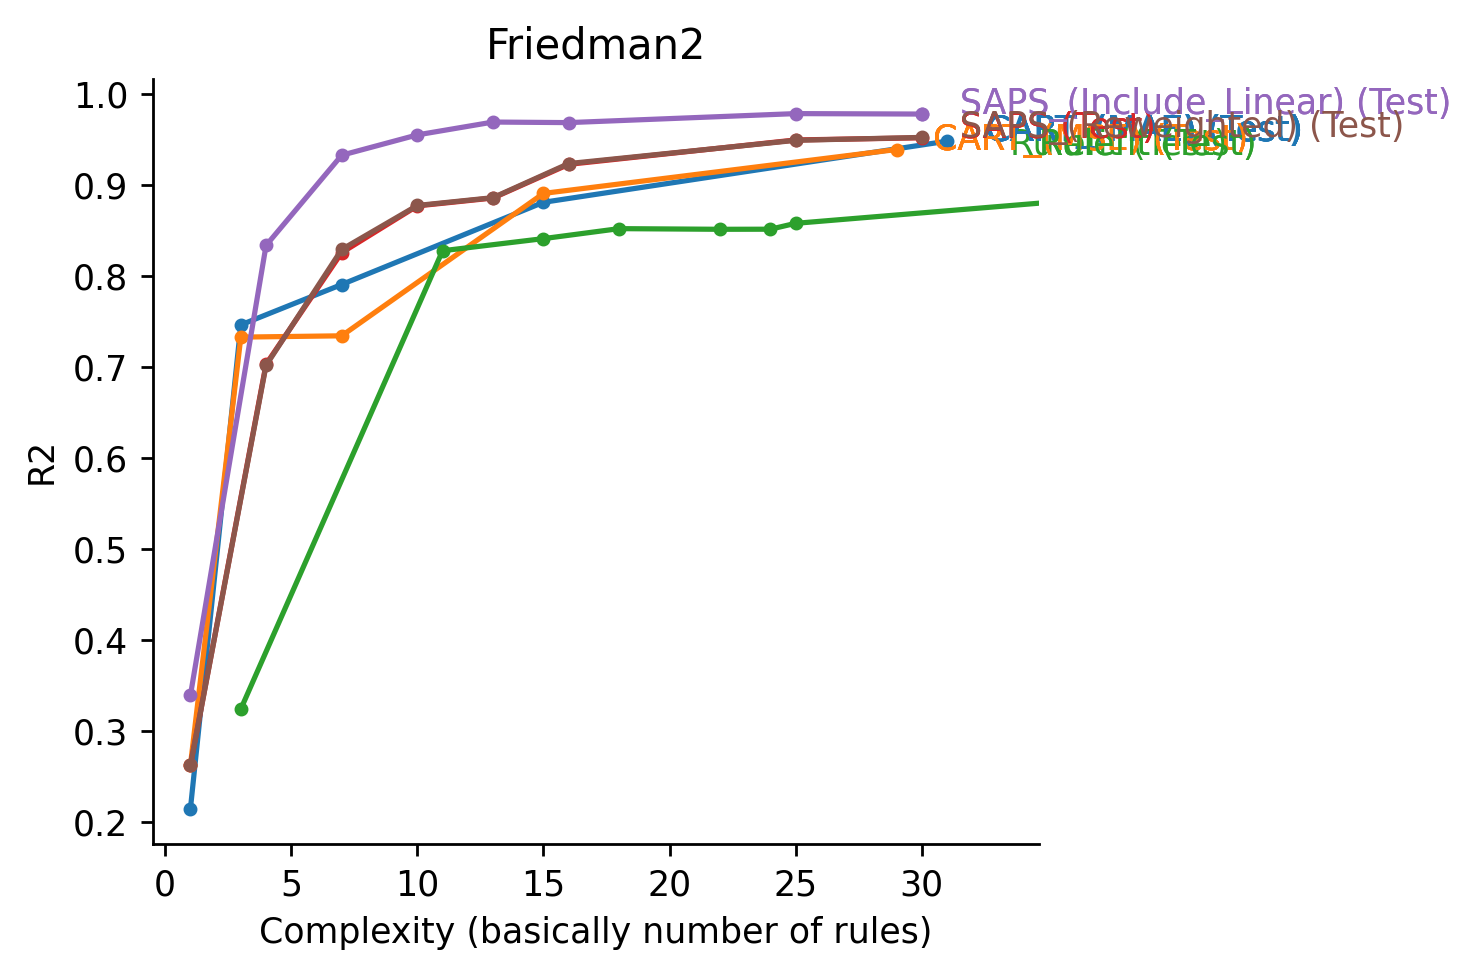

ValueError: Image size of 87115x975 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x1000 with 1 Axes>

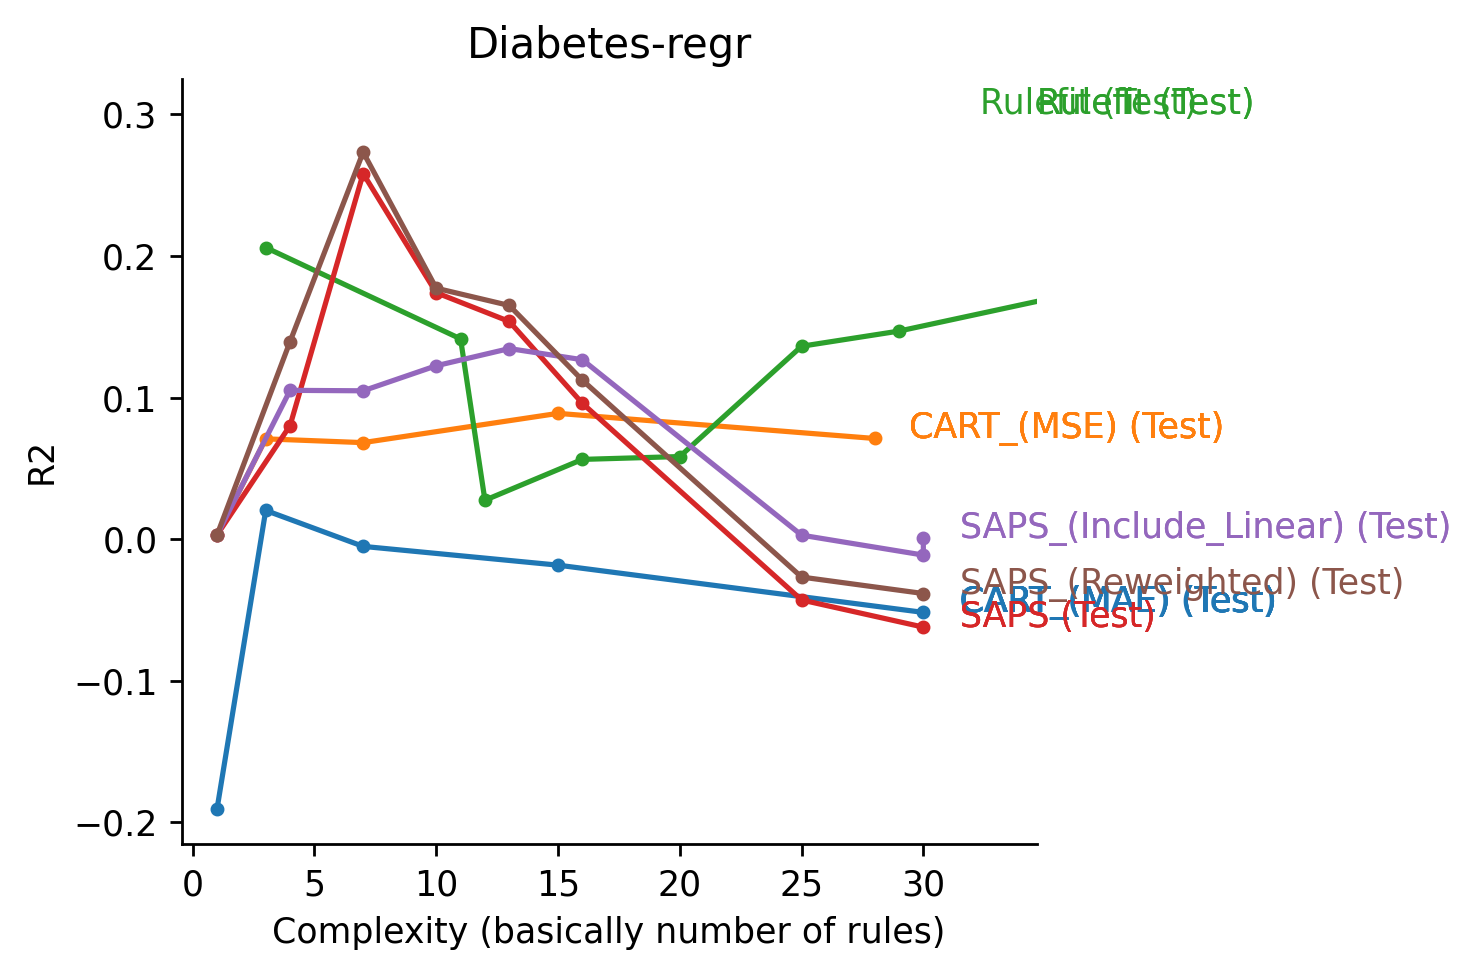

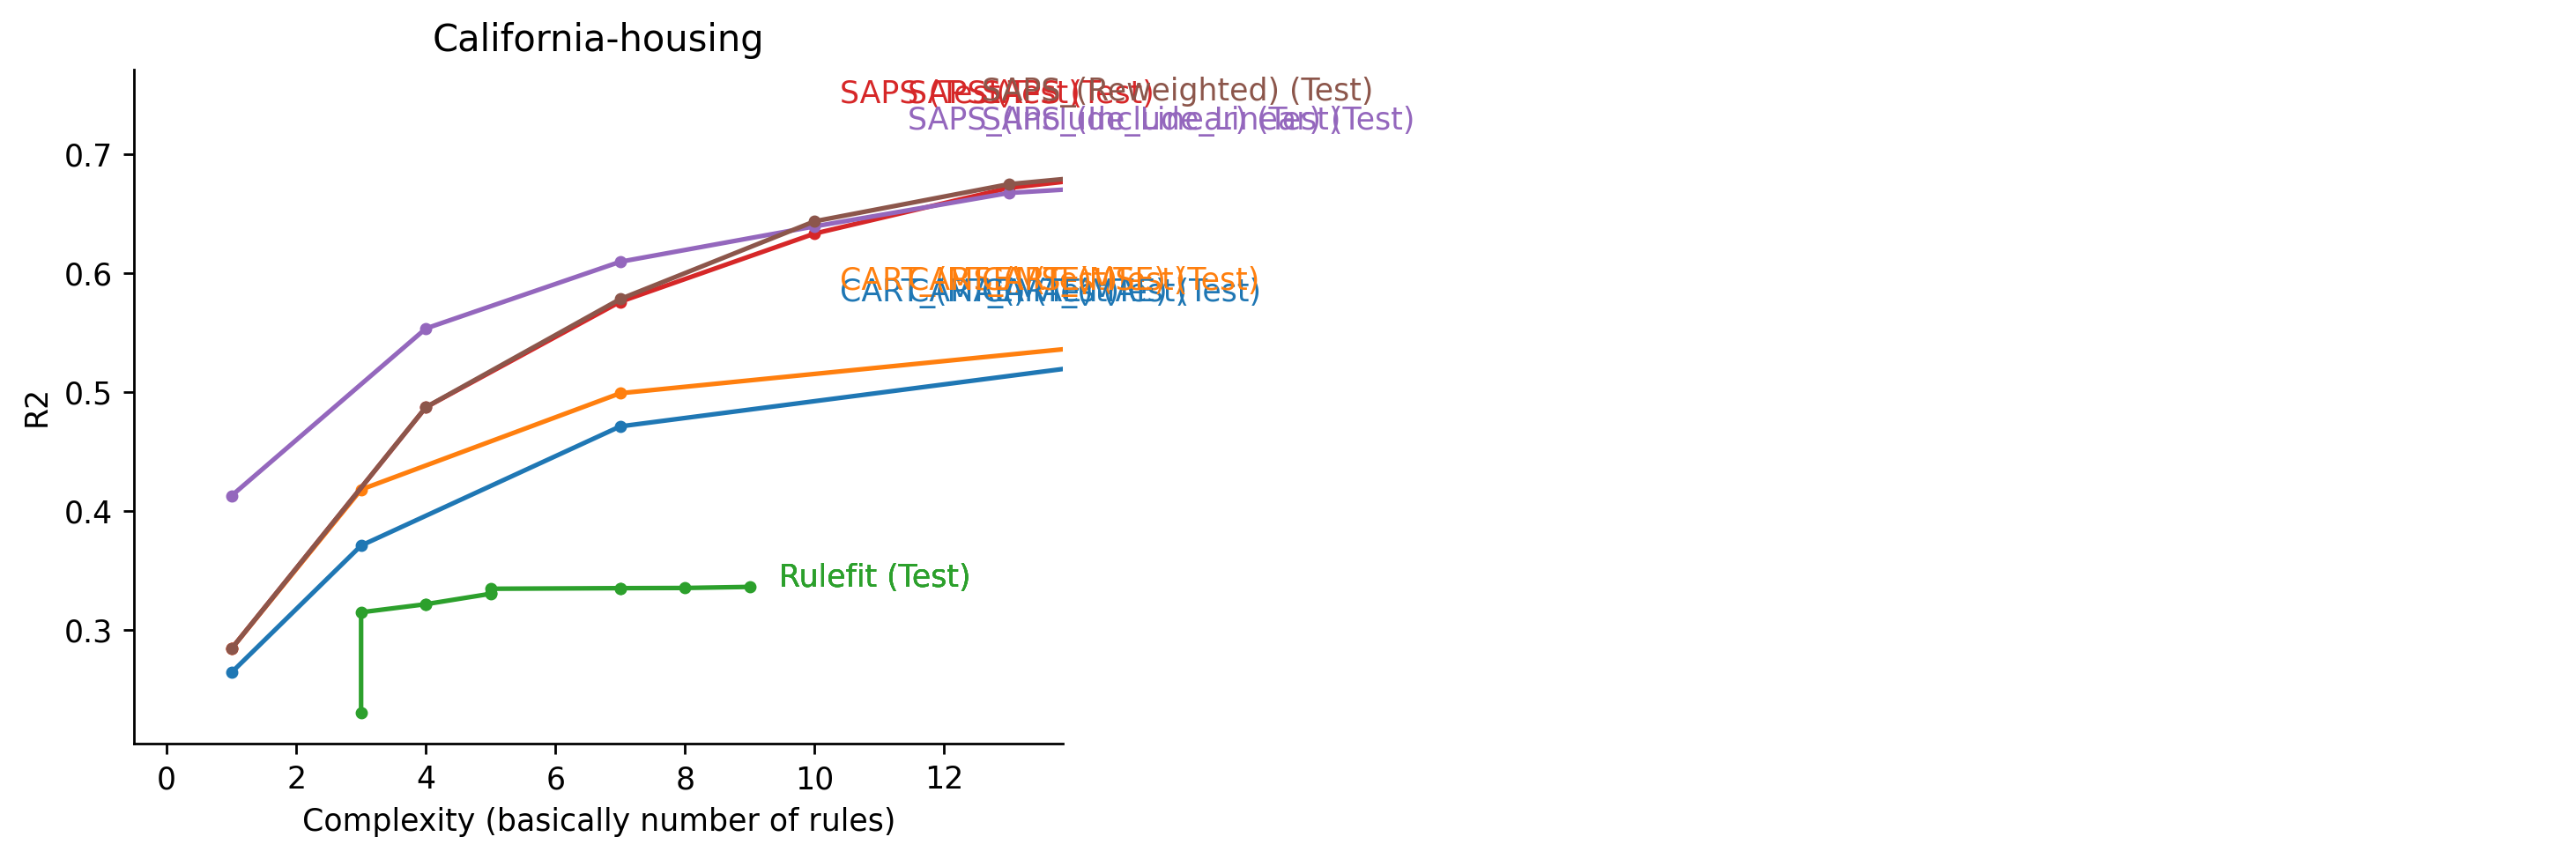

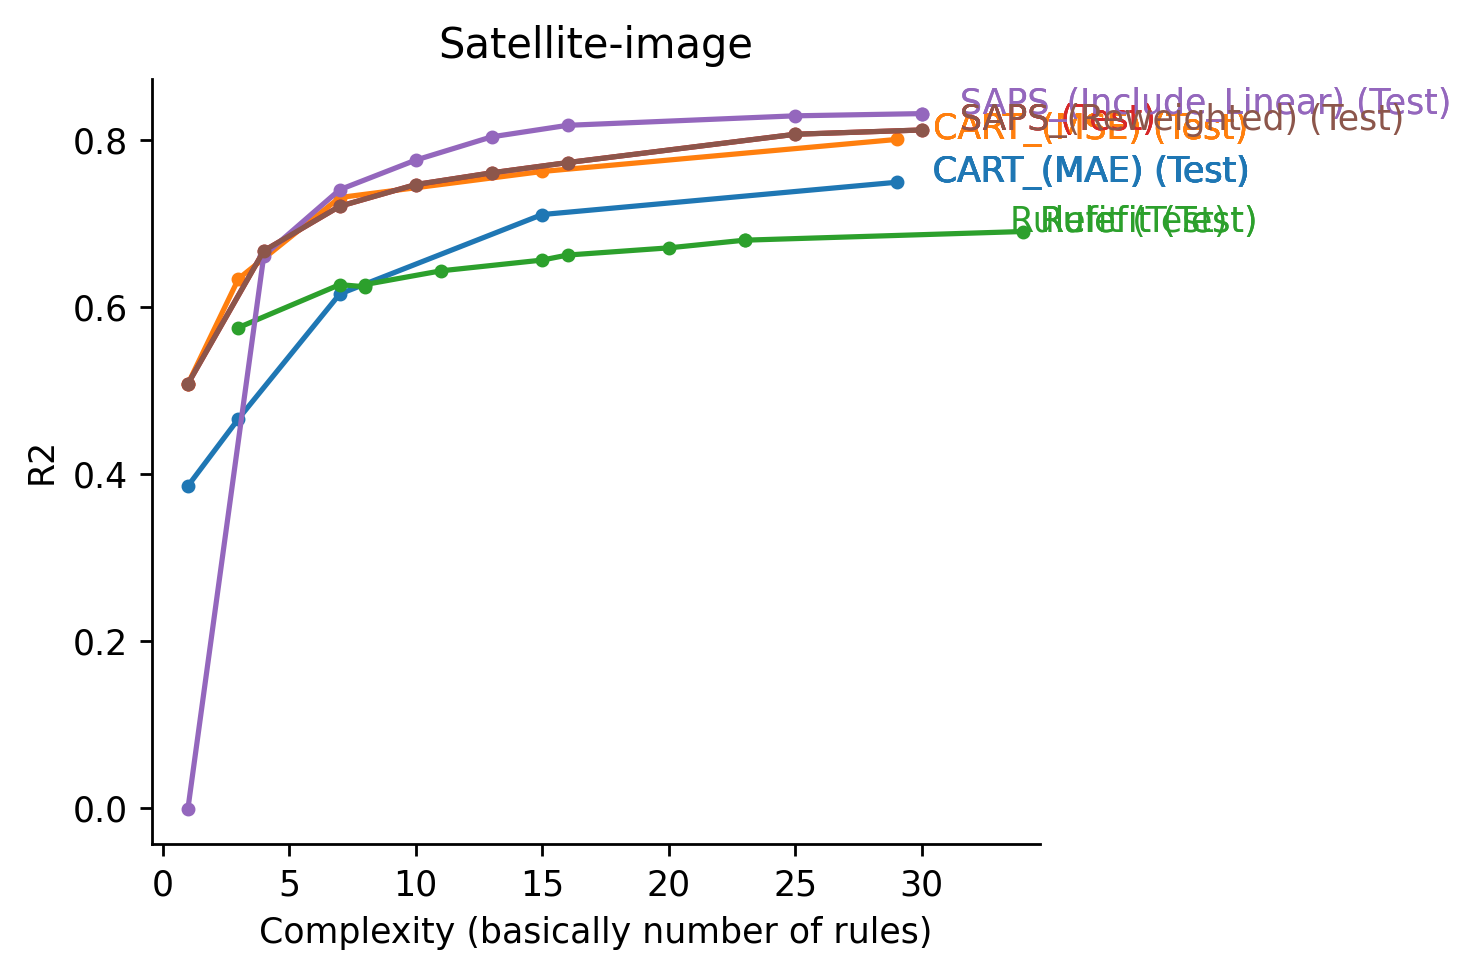

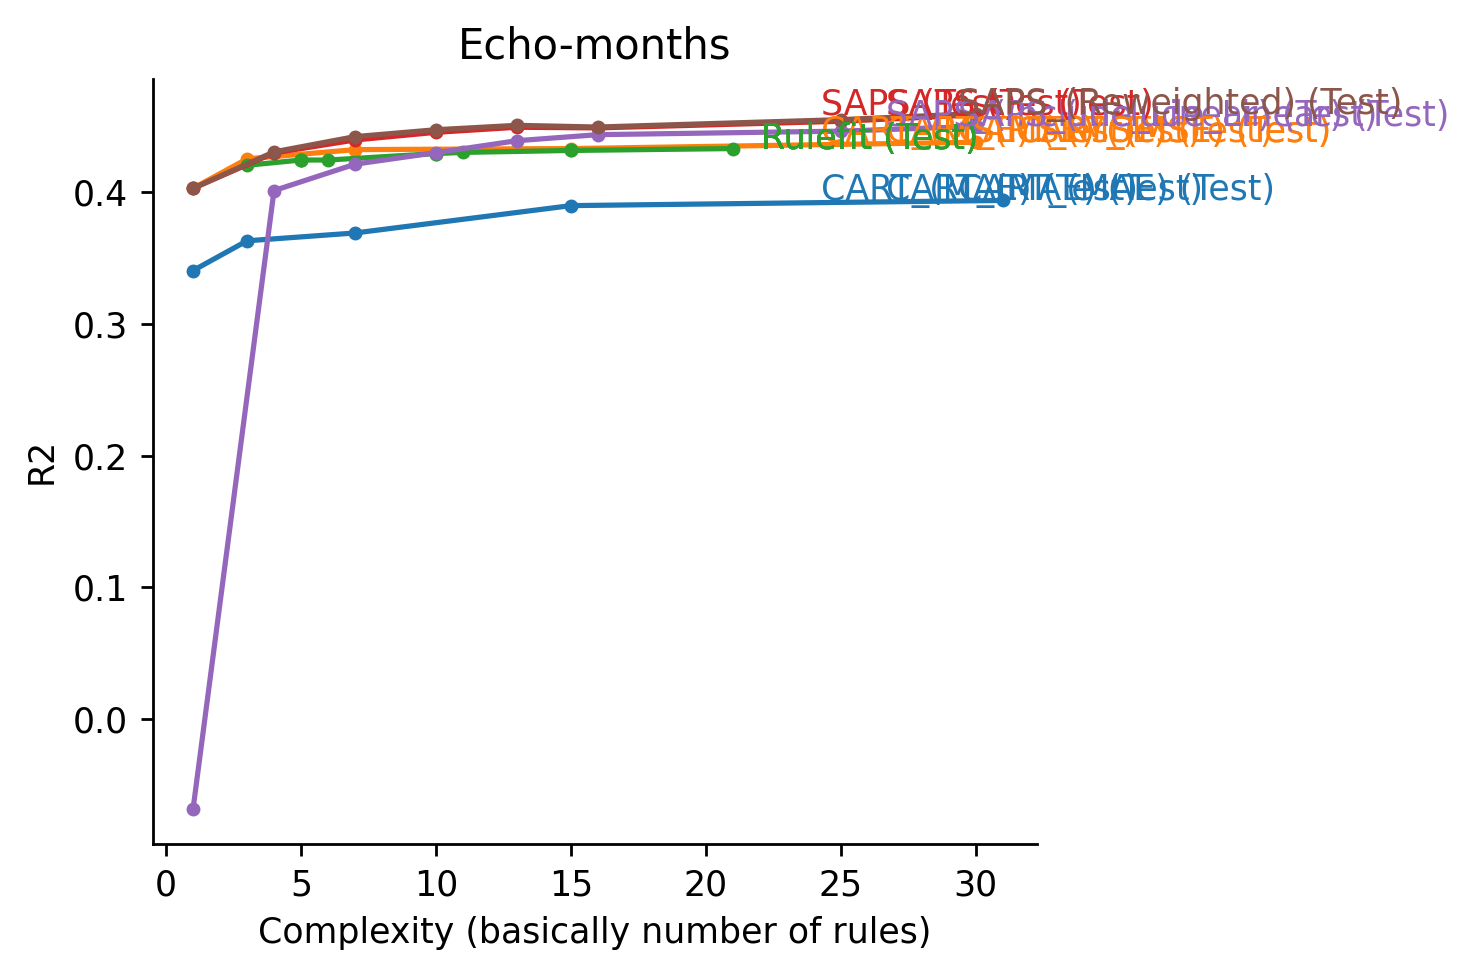

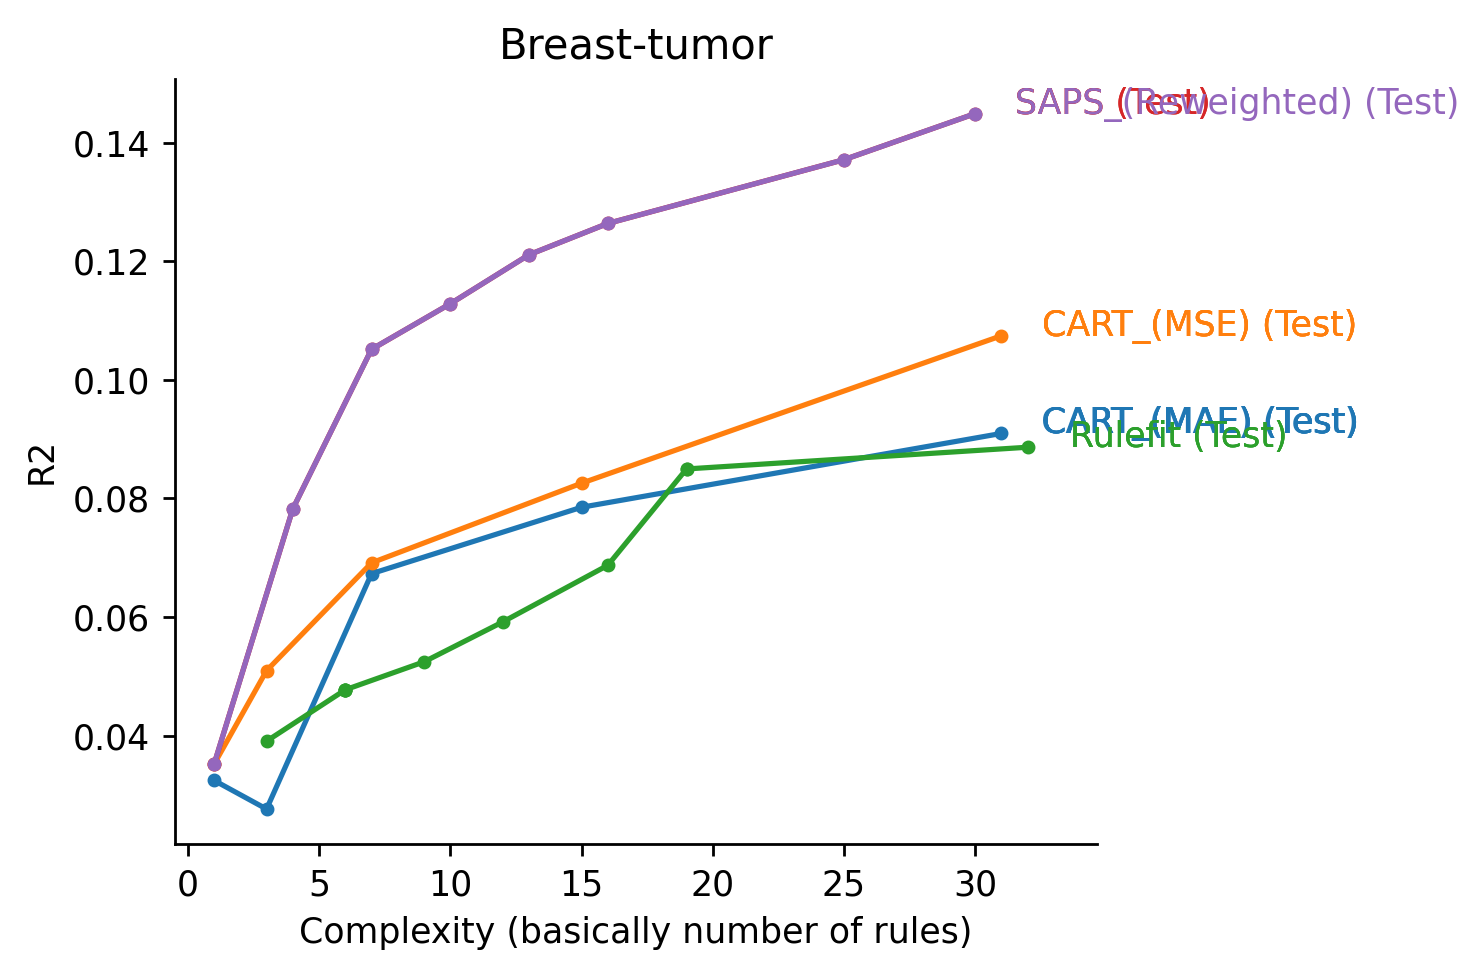

In [23]:
metric = 'r2'
for dset in DATASETS_REGRESSION:
    dset_name = dset[0]
    pkl_file = oj('../results', 'reg_data', dset_name, 'train-test/combined.pkl')
    df = pkl.load(open(pkl_file, 'rb'))['df']
    df['model'] = df.index

    plt.figure(figsize=(6, 4))
    #     R, C = 1, 2
    for i, (name, g) in enumerate(df.groupby('model')):
        args = np.argsort(g[f'{dset_name}_complexity'])
        plt.title(dset_name.capitalize())
        kwargs = dict(color=colors[i])
        plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_test'][args], '.-', **kwargs,
                 label=name + ' (Test)')
#         plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
#                  label=name + ' (Train)')
        plt.xlabel('Complexity (basically number of rules)')
        #         plt.xlim((0, 25))
        plt.ylabel('R2')
        dvu.line_legend(fontsize=10, xoffset_spacing=0.05, adjust_text_labels=False)